## Observations and Insights 

1. One of the more surprising charts is the box plot for the four specified drug regimens: Capomulin, Ramicane, Infubinol, and Ceftamin. Out of a total of 100 mice in the combined four studies, only one mouse (c326) was an outlier to its respective box plot. This suggests the ending tumor volumes of the mice tested in each drug regimen were tightly grouped. Without charting the starting tumor volumes of these regimens, it is tough to say which drug performed the best. Perhaps Capomulin was only given to mice with relatively small tumors to begin with and so the end results show a grouping of smaller tumors compared to Infubinol or Ceftamin.
1. In studying s185's Capomulin treatment, its tumor volume over time steadily decreases over time suggesting a potentially successful treatment option. A further look into other mice on this drug regimen will help solidify this statement or show that it is a unique case.
1. Lastly, the avg tumor volume vs. weight chart helps show a moderate to strong correlation between the two. It seems that as the weight of a mouse increases, so does the average tumor volume. This is localized to this study and the correlation may strengthen/weaken with more data.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "Resources/mouse_metadata.csv"
study_results_path = "Resources/study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)
print(mouse_metadata.columns.values)
print(study_results.columns.values)

['Mouse ID' 'Drug Regimen' 'Sex' 'Age_months' 'Weight (g)']
['Mouse ID' 'Timepoint' 'Tumor Volume (mm3)' 'Metastatic Sites']


In [2]:
# Combine the data into a single dataset
combined_data_raw = pd.merge(mouse_metadata, study_results, on="Mouse ID", how="outer")
# Display the data table for preview
combined_data_raw

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [3]:
# Stores all of the Box Plot numbers
def getBoxPlotNums(df):
    d = {}
    quartiles = df["Tumor Volume (mm3)"].quantile([.25,.5,.75])
    d["Lower Qrt"] = quartiles[0.25]
    d["Upper Qrt"] = quartiles[0.75]
    d["IQR"] = d["Upper Qrt"]-d["Lower Qrt"]
    d["Lower Bound"] = d["Lower Qrt"] - (1.5*d["IQR"])
    d["Upper Bound"] = d["Upper Qrt"] + (1.5*d["IQR"])
    return d

In [4]:
def getOutliers(df,calcs):
    low_out = df.loc[df["Tumor Volume (mm3)"] < calcs["Lower Bound"],]
    upp_out = df.loc[df["Tumor Volume (mm3)"] > calcs["Upper Bound"],]
    out = pd.merge(low_out,upp_out,how="outer")
    return [out["Drug Regimen"].values,out["Mouse ID"].values,out["Tumor Volume (mm3)"].values]

In [5]:
# Checking the number of mice.
mice_unique = combined_data_raw["Mouse ID"].unique()
len(mice_unique)

249

In [6]:
# Removing the duplicate rows that shows up for Mouse ID and Timepoint.
combined_data_raw["Dupe?"] = combined_data_raw.duplicated(subset=["Mouse ID","Timepoint"],keep=False)
duped_mouse = combined_data_raw.loc[combined_data_raw["Dupe?"] == True,]["Mouse ID"]
duped_mouse = duped_mouse.unique()[0]
combined_data = combined_data_raw.loc[combined_data_raw["Mouse ID"] != duped_mouse,]
combined_data = combined_data.drop(columns="Dupe?")
combined_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [7]:
duped_mouse = combined_data_raw.loc[combined_data_raw["Mouse ID"] == duped_mouse,]
duped_mouse = duped_mouse.drop(columns="Dupe?")
duped_mouse

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [8]:
# Checking the number of mice in the clean DataFrame.
mice_unique_df = combined_data.groupby("Mouse ID")
mice_count = mice_unique_df["Mouse ID"].unique()
len(mice_count)

248

## Summary Statistics

In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.
grouped_drug = combined_data.groupby("Drug Regimen")["Tumor Volume (mm3)"]
compare_drug_tumor = pd.DataFrame({})
compare_drug_tumor["Mean"] = grouped_drug.mean()
compare_drug_tumor["Median"] = grouped_drug.median()
compare_drug_tumor["Variance"] = grouped_drug.var()
compare_drug_tumor["Std Dev"] = grouped_drug.std()
compare_drug_tumor["Std Error"] = grouped_drug.sem()
compare_drug_tumor


,Mean,Median,Variance,Std Dev,Std Error
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [10]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
summary_df = pd.DataFrame({})
summary_df["Summary of Drug Regimen"] = compare_drug_tumor.aggregate({"Mean": "mean",
                             "Median": "mean",
                             "Variance": "mean",
                             "Std Dev": "mean",
                             "Std Error": "mean"})
summary_df

,Summary of Drug Regimen
Mean,50.975982
Median,49.902123
Variance,47.858440
Std Dev,6.821103
Std Error,0.502785


## Bar and Pie Charts

In [11]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
tests_per_drug = combined_data.groupby("Drug Regimen")["Timepoint"].count()
tests_per_drug = tests_per_drug.sort_values(ascending=False)
tests_per_drug

Drug Regimen
Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Stelasyn     181
Placebo      181
Infubinol    178
Ceftamin     178
Propriva     148
Name: Timepoint, dtype: int64

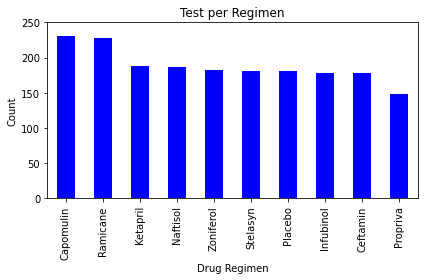

In [12]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
tests_per_drug_plt = tests_per_drug.plot(kind="bar", color='blue',ylim=[0,250])
tests_per_drug_plt.set_title("Test per Regimen")
tests_per_drug_plt.set_xlabel("Drug Regimen")
tests_per_drug_plt.set_ylabel("Count")
plt.tight_layout()

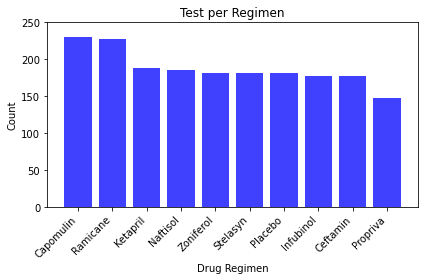

In [13]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
x_axis = tests_per_drug.index
y_axis = tests_per_drug.values
plt.bar(x_axis,y_axis,color='blue',alpha=.75)
plt.xticks(rotation=45,horizontalalignment='right')
plt.title("Test per Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Count")
plt.ylim(0,250)
plt.tight_layout()

Text(0, 0.5, '')

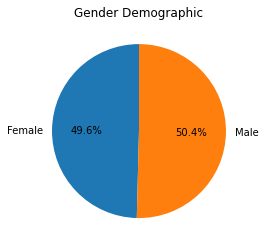

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
combined_gender = combined_data.drop_duplicates("Mouse ID")
combined_gender = combined_gender.groupby("Sex")["Sex"].count()
gender_plt = combined_gender.plot(kind="pie", autopct="%1.1f%%", title="Gender Demographic", startangle=90)
gender_plt.set_ylabel("")

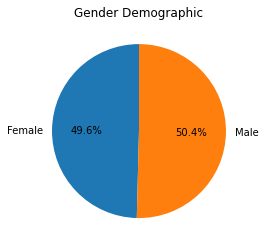

In [15]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
x_axis = combined_gender.values
labels = combined_gender.index
plt.pie(x=x_axis, labels=labels, autopct="%1.1f%%", startangle=90)
plt.title("Gender Demographic")
plt.show()

## Quartiles, Outliers and Boxplots

In [16]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
ending_tumor_size_df = combined_data.sort_values(by=["Mouse ID","Timepoint"])
ending_tumor_size_df = ending_tumor_size_df.drop_duplicates("Mouse ID", keep="last", ignore_index=True)

In [17]:
# Put treatments into a list for for loop (and later for plot labels)
drug_labels = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_data_list = []
    
# Locate the rows which contain mice on each drug and get the tumor volumes
capomulin_data = ending_tumor_size_df.loc[ending_tumor_size_df["Drug Regimen"] == "Capomulin",]
ramicane_data = ending_tumor_size_df.loc[ending_tumor_size_df["Drug Regimen"] == "Ramicane",]
infubinol_data = ending_tumor_size_df.loc[ending_tumor_size_df["Drug Regimen"] == "Infubinol",]
ceftamin_data = ending_tumor_size_df.loc[ending_tumor_size_df["Drug Regimen"] == "Ceftamin",]
drug_subset = [capomulin_data["Tumor Volume (mm3)"],ramicane_data["Tumor Volume (mm3)"],infubinol_data["Tumor Volume (mm3)"],ceftamin_data["Tumor Volume (mm3)"]]

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
capomulin_calcs = getBoxPlotNums(capomulin_data)
ramicane_calcs = getBoxPlotNums(ramicane_data)
infubinol_calcs = getBoxPlotNums(infubinol_data)
ceftamin_calcs = getBoxPlotNums(ceftamin_data)


# Determine outliers using upper and lower bounds
capomulin_outliers = getOutliers(capomulin_data,capomulin_calcs)
ramicane_outliers = getOutliers(ramicane_data,ramicane_calcs)
infubinol_outliers = getOutliers(infubinol_data,infubinol_calcs)
ceftamin_outliers = getOutliers(ceftamin_data,ceftamin_calcs)
outlier_list = [capomulin_outliers,ramicane_outliers,infubinol_outliers,ceftamin_outliers]

subset_mice_count = capomulin_data["Mouse ID"].count()+ramicane_data["Mouse ID"].count()+infubinol_data["Mouse ID"].count()+ceftamin_data["Mouse ID"].count()

print(f"Total mice in the 4 studies: {subset_mice_count}")
for i in outlier_list:
    if len(i[0]) > 0:
        for j in range(len(i[0])):
            print(f"{i[0][j]} outlier found: {i[1][j]} ({round(i[2][j],2)} mm3)")

Total mice in the 4 studies: 100
Infubinol outlier found: c326 (36.32 mm3)


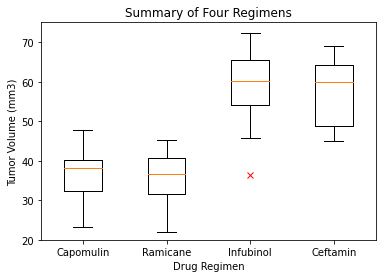

In [18]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig, ax = plt.subplots()
outlier_format = dict(markeredgecolor="r", marker="x")
ax.boxplot(drug_subset, labels=drug_labels, flierprops=outlier_format)
plt.title("Summary of Four Regimens")
plt.xlabel("Drug Regimen")
plt.ylabel("Tumor Volume (mm3)")
plt.ylim(20,75)
plt.show()

## Line and Scatter Plots

Text(0, 0.5, 'Tumor Volume (mm3)')

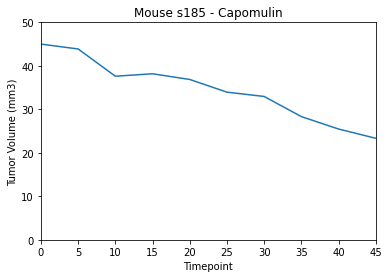

In [19]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
mouse_s185_df = combined_data.loc[combined_data["Mouse ID"]=="s185",]
x = "Timepoint"
y = "Tumor Volume (mm3)"
title = "Mouse s185 - Capomulin"
mouse_s185_plt = mouse_s185_df.plot(x=x, y=y, kind="line", title=title, legend=False, ylim=[0,50], xlim=[0,45])
mouse_s185_plt.set_ylabel("Tumor Volume (mm3)")

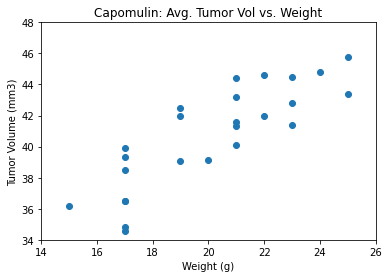

In [20]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
capomulin_raw_data = combined_data.loc[combined_data["Drug Regimen"] == "Capomulin",]
x = capomulin_raw_data.groupby("Mouse ID")["Weight (g)"].mean()
y = capomulin_raw_data.groupby("Mouse ID")["Tumor Volume (mm3)"].mean()
plt.scatter(x,y)
plt.xlim(14,26)
plt.ylim(34,48)
plt.title("Capomulin: Avg. Tumor Vol vs. Weight")
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

## Correlation and Regression

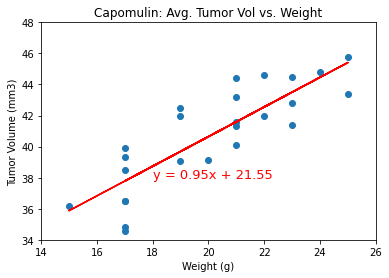

In [21]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x, y)
regression_values = slope*x + intercept
regression_eq = f"y = {round(slope,2)}x + {round(intercept,2)}"
plt.scatter(x,y)
plt.xlim(14,26)
plt.ylim(34,48)
plt.plot(x,regression_values,"r-")
plt.title("Capomulin: Avg. Tumor Vol vs. Weight")
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.annotate(regression_eq,(18,38),fontsize=13,color="red")
plt.show()

In [22]:
print(f"The r value is {rvalue}")
print(f"The r^2 value is {rvalue**2}")

The r value is 0.8419363424694718
The r^2 value is 0.7088568047708717
